In [1]:
import pandas as pd
import numpy as np
import scipy
import seaborn as sns; import matplotlib.pyplot as plt
sns.set(style='white',font_scale=1.5)
from loading_preparing_data import PrepData
from gng_statistics import GNGstats
from plotting import Plotting

In [2]:
# Set the file path
filepath = '../../'

# Create an instance of the PrepData class
prepdata = PrepData('panda', filepath, [])
# Create an instance of the GNGstats class
gngstats = GNGstats()
# Create an instance of the Plotting class
plotting = Plotting('panda')

# Load raw task data
D = prepdata.load_data()
# Prepare action choices for plotting
data = prepdata.extract_data(D)
# load model fits
modelling = prepdata.load_modelfits()

# load rct data
dfRCT = prepdata.load_rctdata()

# Set the file path for saving figures related to the paper
figpath = filepath + 'results/paper_figures/'

In [3]:
# Create DataFrame where modelling and RCT data is merged
df_panda = prepdata.create_df(data, modelling, dfRCT[['ID', 'group']])
df_panda = df_panda.astype(float)

Parameter Correlation
--

In [4]:
# Correlation between estimated parameters averaged over time points (only informative data)
corr_list = np.empty([len(prepdata.parameter_labels[:-1]),len(prepdata.parameter_labels[:-1]),3])
pval_list = np.empty([len(prepdata.parameter_labels[:-1]),len(prepdata.parameter_labels[:-1]),3])
for j in range(3):
    informative_data = df_panda['exclusion' + str(j)] == 0
    tmp = [i + str(1) for i in prepdata.parameter_labels[:-1]]
    corr_list[:,:,j-1] = df_panda[tmp][informative_data].corr()
    pval_list[:,:,j-1] = df_panda[tmp][informative_data].corr()
pd.DataFrame(np.nanmean(corr_list,axis=2), columns=prepdata.parameter_labels[:-1], \
             index=prepdata.parameter_labels[:-1])

,rew_se,loss_se,rew_LR,loss_LR,app_Pav,av_Pav,noise,bias
rew_se,1.000000,0.222845,-0.115307,0.111837,0.279430,-0.013268,-0.415284,0.080471
loss_se,0.222845,1.000000,0.167425,-0.700716,-0.011000,0.239119,0.401816,0.027228
rew_LR,-0.115307,0.167425,1.000000,0.078345,-0.290043,-0.048054,-0.387365,0.438505
loss_LR,0.111837,-0.700716,0.078345,1.000000,-0.034535,-0.593022,-0.385823,0.156781
app_Pav,0.279430,-0.011000,-0.290043,-0.034535,1.000000,0.331198,-0.361769,-0.295447
av_Pav,-0.013268,0.239119,-0.048054,-0.593022,0.331198,1.000000,-0.016915,-0.184176
noise,-0.415284,0.401816,-0.387365,-0.385823,-0.361769,-0.016915,1.000000,-0.376036
bias,0.080471,0.027228,0.438505,0.156781,-0.295447,-0.184176,-0.376036,1.000000


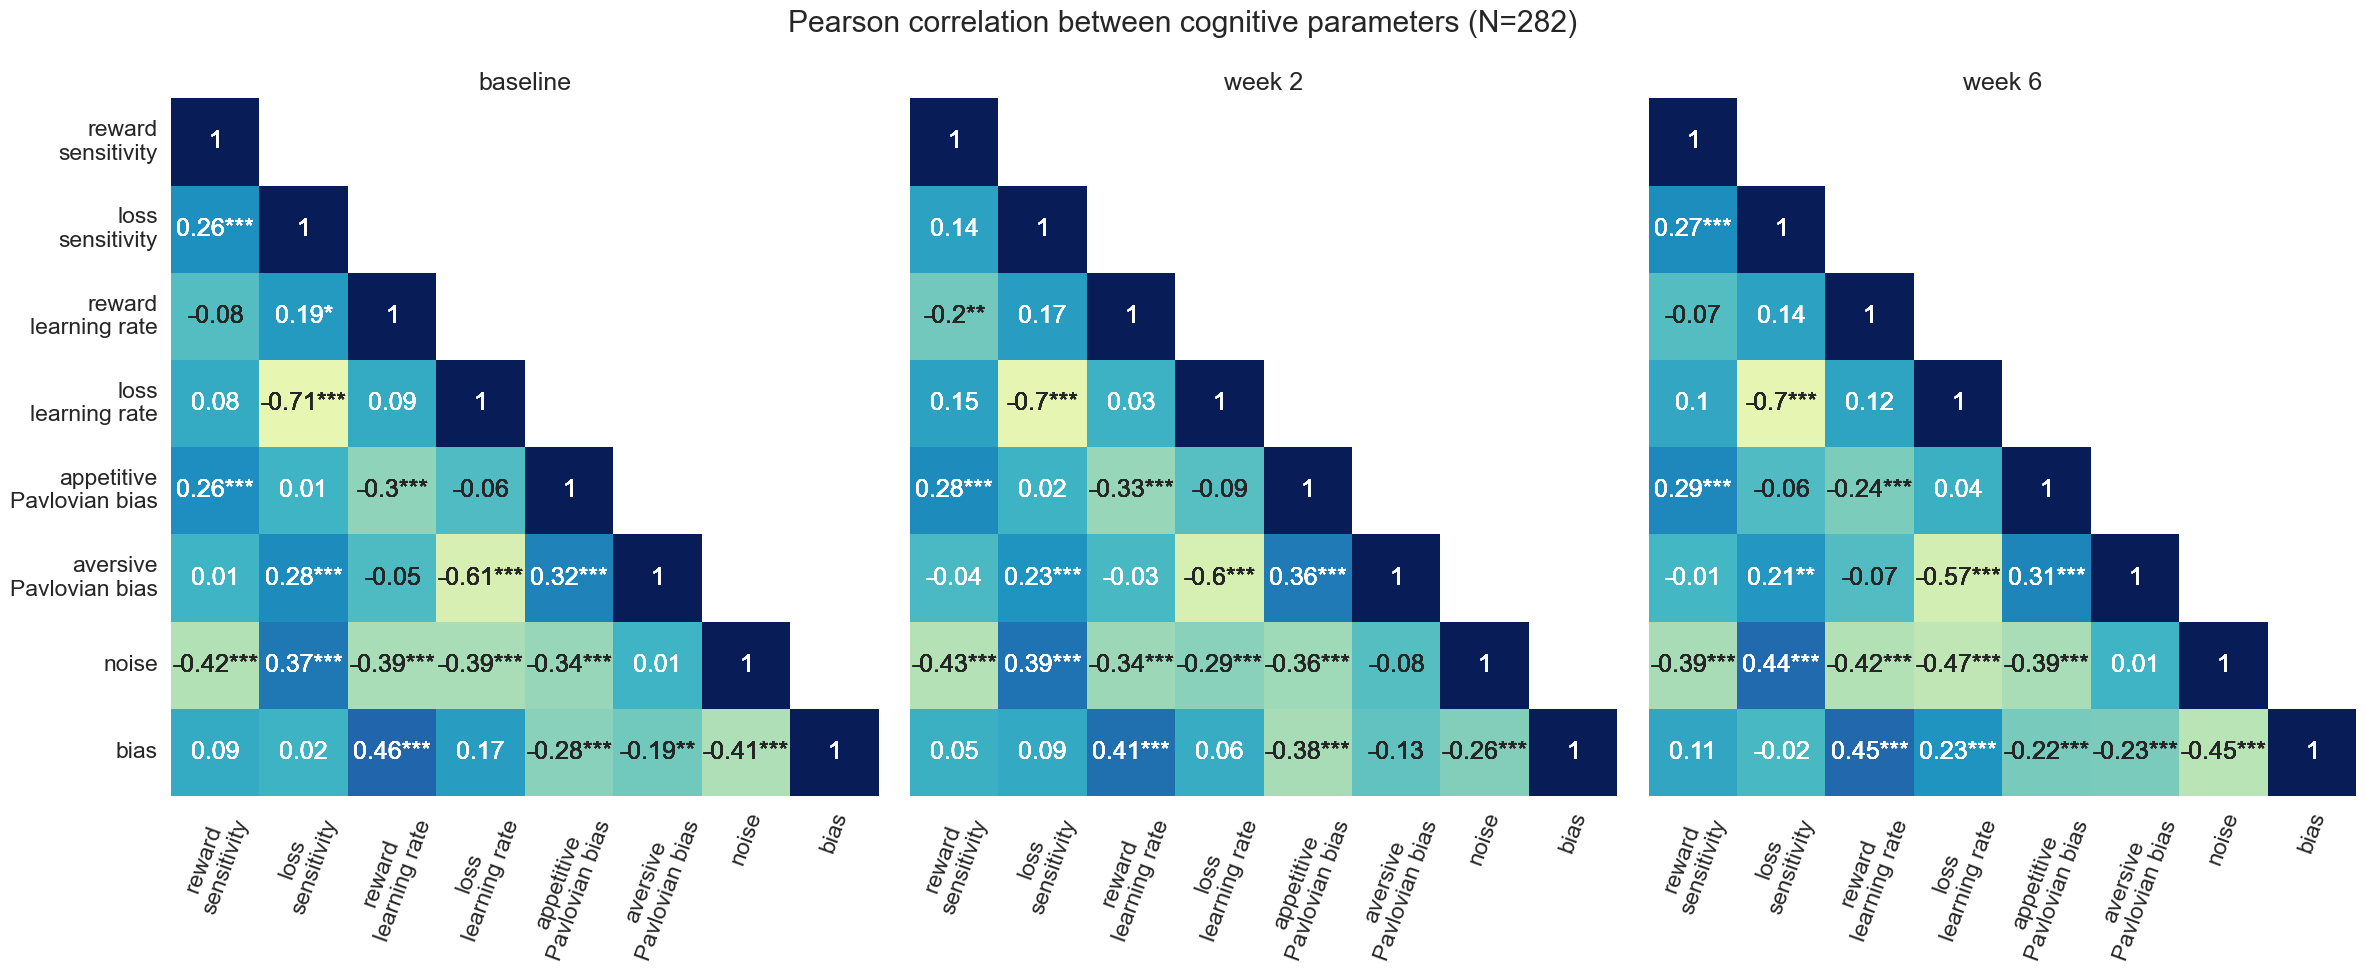

In [5]:
# Parameter correlation plot for different time points (only informative data)
fig, ax = plt.subplots(1,3,figsize=(24, 10))
sns.set(style='white',font_scale=1.5)
m,n = 0,0
for j in range(3):
    informative_data = df_panda['exclusion' + str(j)] == 0
    tmp = [i + str(1) for i in prepdata.parameter_labels[:-1]]
    plotting.correlation_matrix_plot(df_panda[tmp][informative_data], ax[j], fig)
    if j > 0: ax[j].set_yticklabels([])
    ax[j].set(title = plotting.time_label[j])
    ax[j].set_xticklabels(plotting.parameter_labels_split, rotation=70)
fig.suptitle("Pearson correlation between cognitive parameters (N=" + str(sum(informative_data)) + ')')
fig.subplots_adjust(top=0.85, wspace=0)
fig.tight_layout()
for i in ['eps', 'svg']:
    plt.savefig(figpath + 'figsupp_parameter_correlation.' + i, format=i,transparent=True)

Test-Retest
--

In [6]:
# Correlation between measures at different time-points
print('Correlation between measures at different time-points for all gng variables and parameter estimates')
display(gngstats.calculate_trt_reliability(df_panda, prepdata.gng_variables, [0,1,2]).round(2))

print('Correlation between parameter estimates at different time-points only informative data')
informative_data = (df_panda['exclusion0']==0)&(df_panda['exclusion1']==0)&(df_panda['exclusion2']==0)
display(gngstats.calculate_trt_reliability(df_panda, prepdata.parameter_labels, [0,1,2], informative_data).round(2))

print('Specifically in placebo group')
display(gngstats.calculate_trt_reliability(df_panda, prepdata.parameter_labels[:-1], [0,1,2], \
                                    informative_data&(df_panda['group']==0)).round(2))

Correlation between measures at different time-points for all gng variables and parameter estimates


,exclusion,iL,goprotot,acctot,gopro_g2w,gopro_g2a,gopro_ng2w,gopro_ng2a,acc_g2w,acc_g2a,acc_ng2w,acc_ng2a,switch_g2w,switch_g2a,switch_ng2w,switch_ng2a,stay_g2w,stay_g2a,stay_ng2w,stay_ng2a
baseline to T = 1w,0.48,0.31,0.56,0.30,0.46,0.55,0.27,0.40,0.46,0.55,0.27,0.40,0.09,0.16,0.19,0.12,0.12,0.14,0.05,0.17
baseline to T = 2w,0.46,0.30,0.42,0.36,0.40,0.49,0.20,0.39,0.40,0.49,0.20,0.39,0.14,0.19,0.11,0.14,0.08,0.08,0.12,0.11
T = 1w to T = 2w,0.41,0.49,0.52,0.42,0.43,0.55,0.25,0.43,0.43,0.55,0.25,0.43,0.19,0.26,0.18,0.13,0.16,0.12,0.02,0.15


Correlation between parameter estimates at different time-points only informative data


,rew_se,loss_se,rew_LR,loss_LR,app_Pav,av_Pav,noise,bias,rbias
baseline to T = 1w,-0.06,0.26,0.12,0.20,0.26,0.52,0.08,0.37,0.40
baseline to T = 2w,-0.04,0.25,0.04,0.21,0.33,0.47,0.18,0.30,0.26
T = 1w to T = 2w,0.03,0.18,0.12,0.17,0.34,0.43,0.07,0.33,0.45


Specifically in placebo group


,rew_se,loss_se,rew_LR,loss_LR,app_Pav,av_Pav,noise,bias
baseline to T = 1w,-0.13,0.20,0.05,0.23,0.36,0.55,0.08,0.38
baseline to T = 2w,-0.21,0.14,-0.10,0.18,0.37,0.51,0.07,0.13
T = 1w to T = 2w,-0.06,0.24,0.02,0.26,0.34,0.53,0.15,0.30


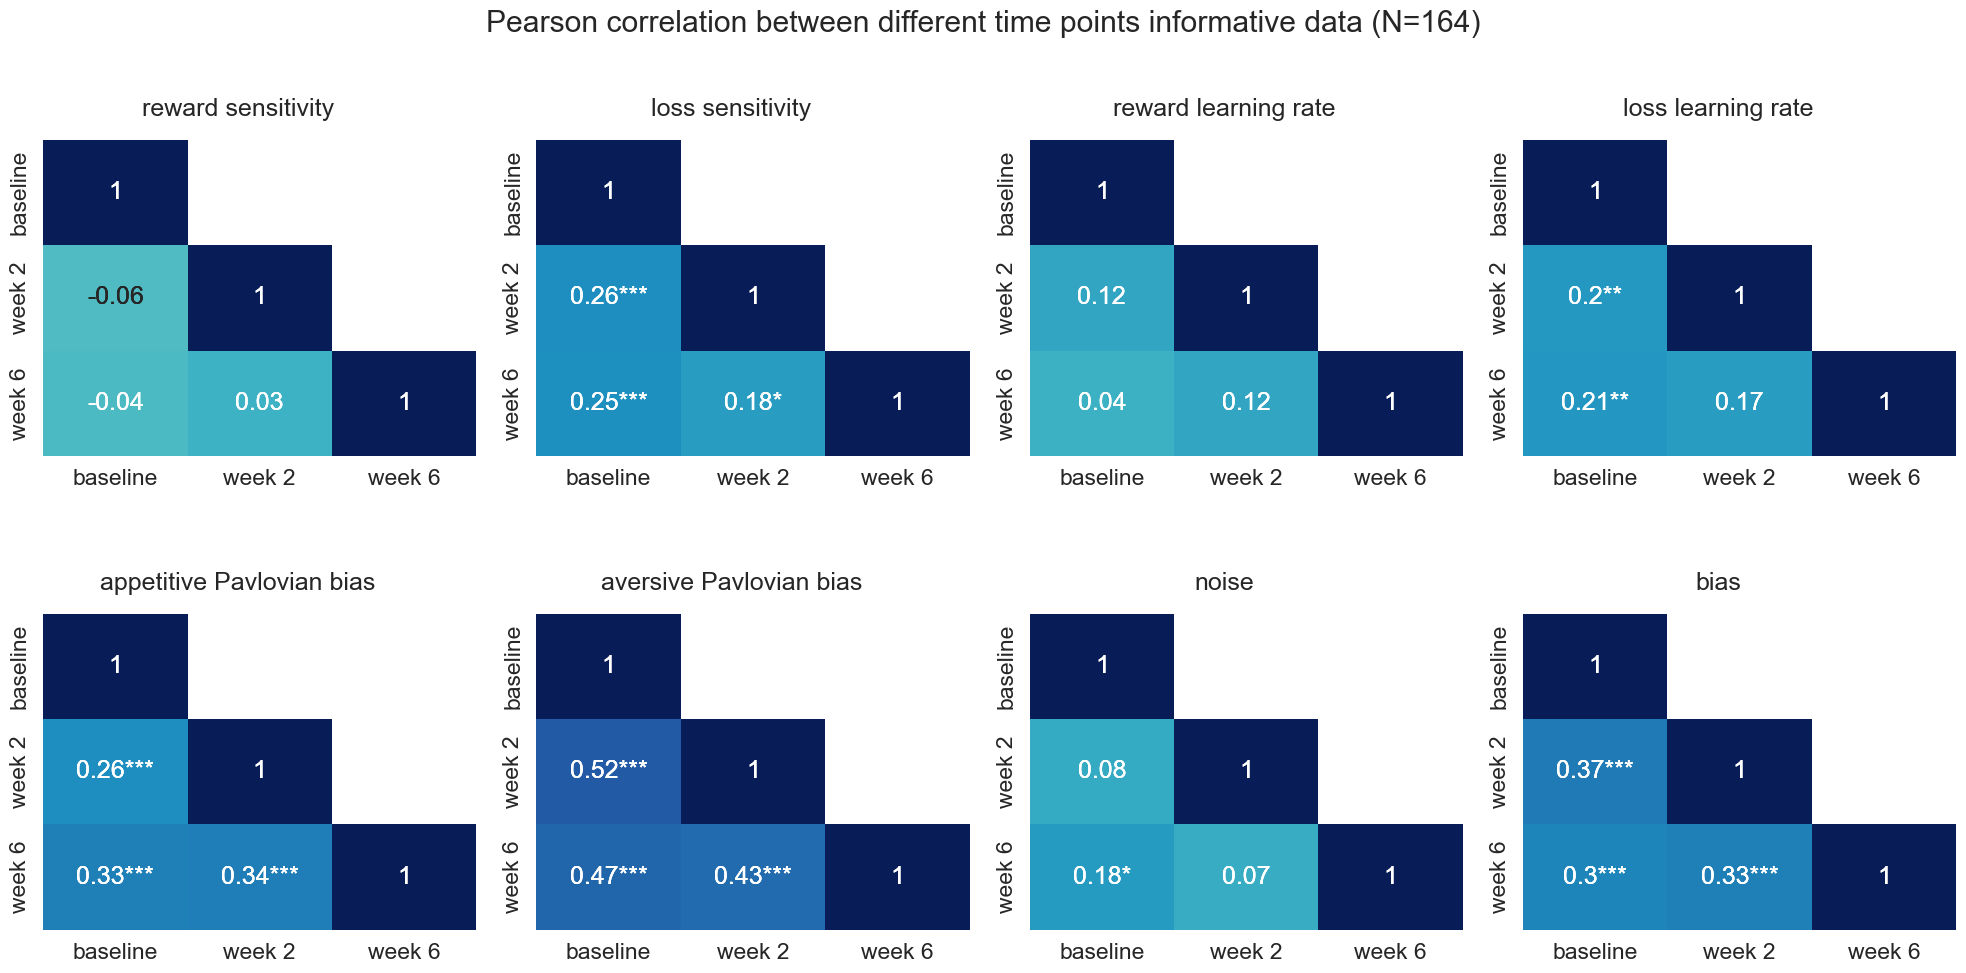

In [7]:
# Plot parameter correlation between different time points (only informative data)
fig, ax = plt.subplots(2,4,figsize=(20, 10))
sns.set(style='white',font_scale=1.5)
m,n = 0,0
for i,j in enumerate(prepdata.parameter_labels[:-1]):
    tmp =[x for x in df_panda.columns if j in x]
    if j == 'bias': tmp = [z for z in tmp if 'r' not in z]
    plotting.correlation_matrix_plot(df_panda[tmp][informative_data], ax[n,m], fig, \
                                     plotting.time_label,plotting.time_label)
    ax[n,m].set_title(plotting.parameter_labels[i], y=1.05, x=0.45)
    m += 1
    if i == 3: m,n = 0,1
fig.tight_layout()
fig.suptitle("Pearson correlation between different time points informative data (N=" + \
            str(sum(informative_data)) + ')')
fig.subplots_adjust(top=0.85, hspace=0.5)

for i in ['eps', 'svg']:
    plt.savefig(figpath + 'figsupp_trt_pearson_inf.' + i, format=i,transparent=True)

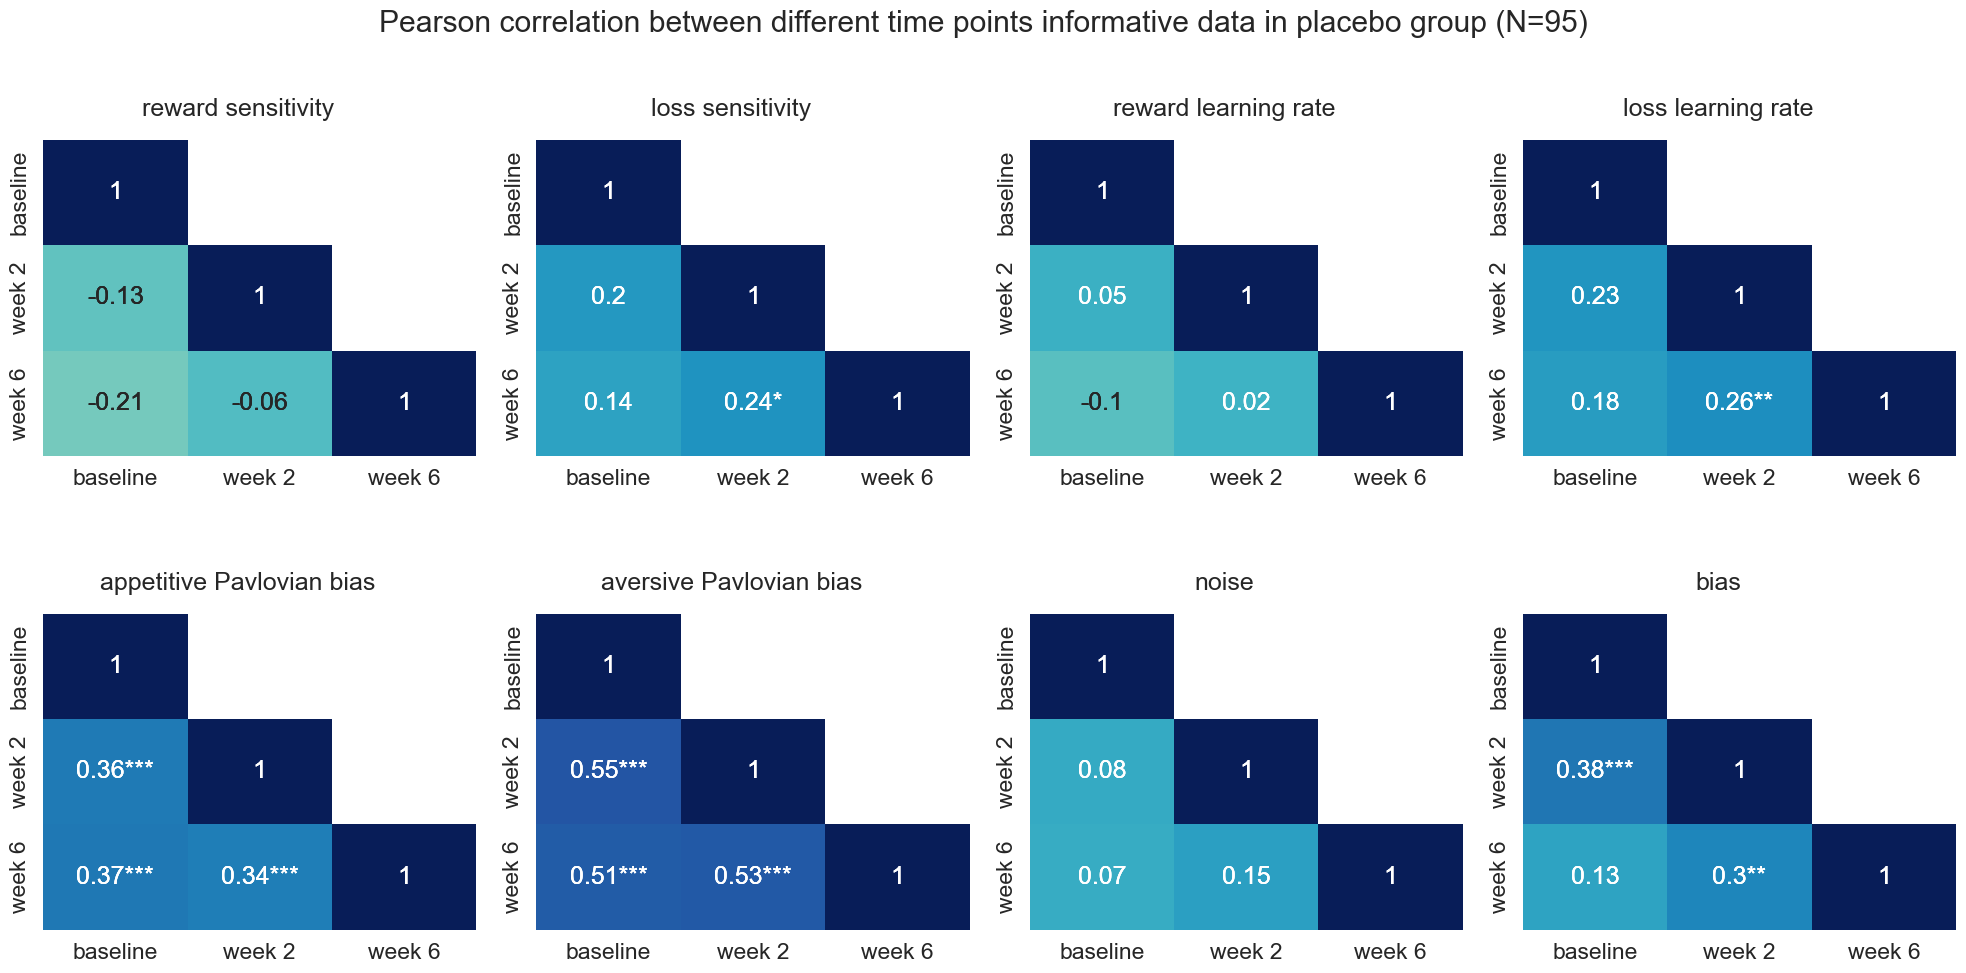

In [8]:
# plot parameter correlation between different time points from placebo group (only informative data)
fig, ax = plt.subplots(2,4,figsize=(20, 10))
sns.set(style='white',font_scale=1.5)
m,n = 0,0
for i,j in enumerate(prepdata.parameter_labels[:-1]):
    tmp =[x for x in df_panda.columns if j in x]
    if j == 'bias': tmp = [z for z in tmp if 'r' not in z]
    plotting.correlation_matrix_plot(df_panda[tmp][informative_data&(df_panda['group']==0)], ax[n,m], fig, \
                                     plotting.time_label,plotting.time_label)
    ax[n,m].set_title(plotting.parameter_labels[i], y=1.05, x=0.45)
    m += 1
    if i == 3: m,n = 0,1
fig.tight_layout()
fig.suptitle("Pearson correlation between different time points informative data in placebo group (N=" + \
            str(sum(informative_data&(df_panda['group']==0))) + ')')
fig.subplots_adjust(top=0.85, hspace=0.5)

for i in ['eps', 'svg']:
    plt.savefig(figpath + 'figsupp_trt_pearson_placebo.' + i, format=i,transparent=True)

In [9]:
# Interclass correlation coefficient only patients which had all timepoints informative data
informative_data = (df_panda['exclusion0']==0)&(df_panda['exclusion1']==0)&(df_panda['exclusion2']==0)
icc = gngstats.calculate_icc(df_panda[informative_data], prepdata.parameter_labels[:-1], [0,1,2])
display(icc.round(2))
# print(icc.round(2).astype(str).to_latex())

# specifically in placebo group
icc = gngstats.calculate_icc(df_panda[informative_data&(df_panda['group']==0)], \
                             prepdata.parameter_labels[:-1], [0,1,2])
display(icc.round(2))
# print(icc.round(2).astype(str).to_latex())

,ICC,F,df1,df2,pval,CI95%
rew_se,-0.02,0.93,163,326,0.69,"[-0.1, 0.07]"
loss_se,0.23,1.89,163,326,0.00,"[0.13, 0.33]"
rew_LR,0.09,1.30,163,326,0.02,"[0.0, 0.19]"
loss_LR,0.19,1.71,163,326,0.00,"[0.1, 0.29]"
app_Pav,0.31,2.34,163,326,0.00,"[0.21, 0.41]"
av_Pav,0.47,3.69,163,326,0.00,"[0.38, 0.56]"
noise,0.11,1.38,163,326,0.01,"[0.02, 0.21]"
bias,0.33,2.51,163,326,0.00,"[0.24, 0.43]"


,ICC,F,df1,df2,pval,CI95%
rew_se,-0.13,0.64,94,188,0.99,"[-0.22, -0.03]"
loss_se,0.19,1.71,94,188,0.00,"[0.07, 0.33]"
rew_LR,-0.01,0.98,94,188,0.54,"[-0.11, 0.12]"
loss_LR,0.22,1.84,94,188,0.00,"[0.09, 0.35]"
app_Pav,0.35,2.64,94,188,0.00,"[0.23, 0.48]"
av_Pav,0.53,4.38,94,188,0.00,"[0.41, 0.64]"
noise,0.10,1.32,94,188,0.06,"[-0.02, 0.23]"
bias,0.27,2.09,94,188,0.00,"[0.14, 0.4]"


Parameter Recovery
--
For each parameter of the most parsimonious model, we sampled parameter values from a normal distribution defined by the mean and standard deviation of the hyperprior over parameter estimates from empirical data, which we used to simulate behaviour for N=200. For each simulated dataset, we fitted the model and analysed the correlation between the simulated and the re-estimated parameters. Here we report the average confusion matrix over 100 times this procedure was performed.

In [10]:
# Load recovery data
mat = scipy.io.loadmat(filepath + 'results/recovery/ll2b2a2epxb_recovery_202208220000.mat')
restart = mat['fit'].shape[1] # number of times recovery was run
n_parameters = len(mat['D'][0][0]['trueParam'][0][0]) # number of parameters of model
Nsj = len(mat['D'][0][0]['trueParam'][0]) # number of subjects

In [11]:
# Extract known and re-estimated parameter from mat file
params = {'parameter_known': np.empty([restart, Nsj, n_parameters]), \
          'parameter_estimates': np.empty([restart, Nsj, n_parameters])}
for j in range(n_parameters):
    tmp = []
    for i in range(restart):
        params['parameter_known'][i,:,:] = np.hstack(mat['D'][0][i]['trueParam'][0]).T
        tmp.append(mat['fit'][0][i]['parest'][0][0][j])
    params['parameter_estimates'][:,:,j] = np.array(tmp)

# Calculate confusionmatrix for each recovery
corrmatrix = np.empty([n_parameters,n_parameters,restart])
for f in range(restart):
    for i in range(n_parameters):
        for j in range(n_parameters):
            corrmatrix[i,j,f] = np.corrcoef(params['parameter_estimates'][f,:,i], \
                                            params['parameter_known'][f,:,j])[1,0]

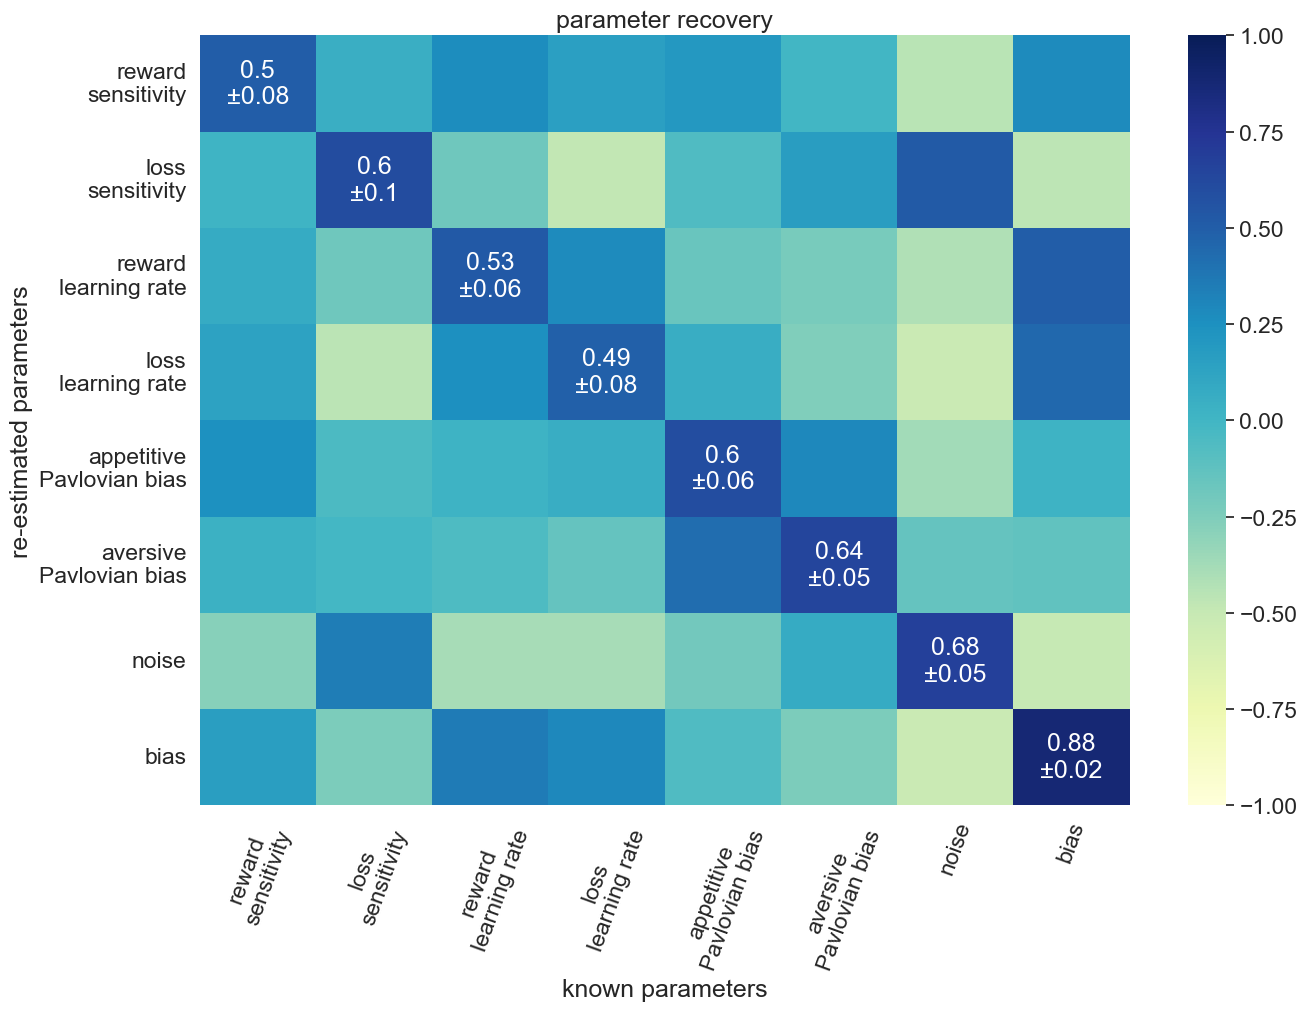

In [17]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(15, 10))
sns.set(style='white',font_scale=1.5)
plotting.confusion_matrix_plot(corrmatrix,ax,fig)
ax.set_xticklabels(plotting.parameter_labels_split, rotation=70);
ax.set_title('parameter recovery')
ax.set_xlabel('known parameters')
ax.set_ylabel('re-estimated parameters')
for i in ['eps', 'svg']:
    plt.savefig(figpath + 'figsupp_confusionmatrix.' + i, format=i,transparent=True)

What do parameter actually measure?
--
We look at correlations between parameter estimates and task characterstics

In [13]:
# Are Pavlovian parameters related to the performance difference in Pavlovian congurent and incongurent conditions?
mle_df = prepdata.create_mle_df(df_panda, prepdata.gng_variables + prepdata.parameter_labels, [])
mle_df['g2w-ng2w'] = mle_df['acc_g2w'] - mle_df['acc_ng2w']
mle_df['ng2a-g2a'] = mle_df['acc_ng2a'] - mle_df['acc_g2a']
mle_df['g2w-g2a'] = mle_df['acc_g2w'] - mle_df['acc_g2a']
mle_df['ng2a-ng2w'] = mle_df['acc_ng2a'] - mle_df['acc_ng2w']

In [14]:
print('correlation between appetitive Pavlovian parameters and go2win - nogo2win: ' + \
      str(mle_df[['app_Pav','g2w-ng2w']].corr().iloc[0,1].round(2)))
print('correlation between aversive Pavlovian parameters and nogo2avoid - go2avoid: ' + \
      str(mle_df[['av_Pav','ng2a-g2a']].corr().iloc[0,1].round(2)))

correlation between appetitive Pavlovian parameters and go2win - nogo2win: 0.26
correlation between aversive Pavlovian parameters and nogo2avoid - go2avoid: 0.67


In [15]:
# Switch probability after worst outcome (neutral in win condition and loss in loss conditions)
mle_df[prepdata.parameter_labels + [i for i in mle_df if 'switch' in i]].corr().iloc[:8,9:]

,switch_g2w,switch_g2a,switch_ng2w,switch_ng2a
rew_se,-0.103075,-0.021546,-0.184693,-0.014957
loss_se,-0.241086,-0.171928,-0.150542,-0.038285
rew_LR,0.098788,0.147732,-0.018870,0.089025
loss_LR,0.165880,0.241323,0.015452,0.117375
app_Pav,0.132567,-0.103364,0.069495,-0.028766
av_Pav,-0.097866,-0.364178,0.041527,-0.174088
noise,-0.249816,-0.197066,-0.025283,-0.070282
bias,0.227708,0.366681,-0.068918,0.146329


In [16]:
# Stay probability after worst outcome (win in win condition and netural in loss conditions)
mle_df[prepdata.parameter_labels + [i for i in mle_df if 'stay' in i]].corr().iloc[:8,9:]

,stay_g2w,stay_g2a,stay_ng2w,stay_ng2a
rew_se,0.215504,0.094334,0.094864,0.137602
loss_se,0.211413,0.137279,0.172693,0.336978
rew_LR,0.203151,0.057492,0.058581,-0.043883
loss_LR,-0.015086,0.035058,-0.046315,-0.116272
app_Pav,-0.133051,-0.079115,-0.334949,-0.004073
av_Pav,-0.036521,-0.069929,-0.077149,0.043994
noise,-0.010035,0.060783,0.203638,0.251586
bias,0.078984,0.078496,-0.149326,-0.230488
